In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from torchsummary import summary
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\data\Student_performance_data _.csv")
df.sample(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
994,1995,18,0,0,3,16.320670,26,1,2,0,0,0,0,0.743592,4.0
1253,2254,16,1,0,3,2.606479,19,0,3,0,0,0,1,0.690151,4.0
513,1514,16,0,0,2,16.756828,15,1,3,0,1,0,1,2.353731,3.0
43,1044,18,1,0,1,18.245091,9,0,2,0,1,0,0,2.888892,2.0
765,1766,17,0,0,1,12.820121,10,1,1,0,1,0,0,2.465306,3.0


In [3]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
#split dataset

#convert numpy arrays
X = df.drop(columns=['Tutoring', 'StudentID']).values
y = df['Tutoring'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print('X_train shape is : {}'.format(X_train.shape),'\n')
print('X_test  shape is : {}'.format(X_test.shape),'\n')
print('y_train shape is : {}'.format(y_train.shape),'\n')
print('y_test  shape is : {}'.format(y_test.shape),'\n')

X_train shape is : (1913, 13) 

X_test  shape is : (479, 13) 

y_train shape is : (1913,) 

y_test  shape is : (479,) 



In [5]:
type(X_train)

numpy.ndarray

In [21]:
BATCH_SIZE = 16

data_loader = DataLoader(dataset = list(zip(X_train, y_train)),batch_size = BATCH_SIZE, shuffle = True)
data, labels = next(iter(data_loader))

print("The shape of singular batch size of training : {}".format(data.size()))
print("The shape of singular batch size of testing  : {}".format(labels.size()))
     

The shape of singular batch size of training : torch.Size([16, 13])
The shape of singular batch size of testing  : torch.Size([16])


In [7]:
###ANN building

class StudentClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #create 1st hidden layer
        self.hidden_layer_1 = nn.Linear(in_features=13, out_features=128, bias=True)
        self.activation_1 = nn.ReLU()
        #create 2nd hidden layer
        self.hidden_layer_2 = nn.Linear(in_features=128, out_features=64, bias=True)
        self.activation_2 = nn.ReLU()
        #create output layer
        self.output_layer = nn.Linear(in_features=64, out_features=1, bias=True)
        self.activation_output = nn.Sigmoid()
        
    def forward(self, x):
        #activation(W^T + B); x = training dataset
        X = self.hidden_layer_1(x)
        X = self.activation_1(X)
        X = self.hidden_layer_2(X)
        X = self.activation_2(X)
        X = self.output_layer(X)
        X = self.activation_output(X)
        
        return X
    
    
model = StudentClassifier()
print(model, '\n\n\n')
print(model.parameters)

StudentClassifier(
  (hidden_layer_1): Linear(in_features=13, out_features=128, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation_output): Sigmoid()
) 



<bound method Module.parameters of StudentClassifier(
  (hidden_layer_1): Linear(in_features=13, out_features=128, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation_output): Sigmoid()
)>


In [8]:
print(model.parameters(),'\n\n\n')
summary(model, X_train.shape)

<generator object Module.parameters at 0x0000023406628660> 



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1913, 128]           1,792
              ReLU-2            [-1, 1913, 128]               0
            Linear-3             [-1, 1913, 64]           8,256
              ReLU-4             [-1, 1913, 64]               0
            Linear-5              [-1, 1913, 1]              65
           Sigmoid-6              [-1, 1913, 1]               0
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/backward pass size (MB): 5.63
Params size (MB): 0.04
Estimated Total Size (MB): 5.77
----------------------------------------------------------------


In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
#training
dtype = torch.float32 #making same dtype for X, y
epochs = 64
Loss = []
model.train()
for epoch in range(epochs):
    #Call data_loader so that we can pass the X_train data to the model with batch_size
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(dtype=dtype)
        y_batch = y_batch.to(dtype=dtype)
        #pass X_batch to the model
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.reshape(-1,1))
        Loss.append(loss)
        #Initialize the Gradient
        optimizer.zero_grad()
        #calculating loss, then do back propagation
        loss.backward()
        optimizer.step()
    print('Epoch {}, Loss {}'.format(epoch, loss))

Epoch 0, Loss 0.563015878200531
Epoch 1, Loss 0.5460332036018372
Epoch 2, Loss 0.6291385889053345
Epoch 3, Loss 0.8234680891036987
Epoch 4, Loss 0.44262537360191345
Epoch 5, Loss 0.5420003533363342
Epoch 6, Loss 0.5268036127090454
Epoch 7, Loss 0.43893373012542725
Epoch 8, Loss 0.7899608612060547
Epoch 9, Loss 0.47849041223526
Epoch 10, Loss 0.2787257134914398
Epoch 11, Loss 0.3489636182785034
Epoch 12, Loss 0.41865289211273193
Epoch 13, Loss 0.27288150787353516
Epoch 14, Loss 0.8279554843902588
Epoch 15, Loss 0.516212522983551
Epoch 16, Loss 0.4842964708805084
Epoch 17, Loss 0.5967707633972168
Epoch 18, Loss 0.3050518035888672
Epoch 19, Loss 0.5894871950149536
Epoch 20, Loss 0.5035932660102844
Epoch 21, Loss 0.3839122951030731
Epoch 22, Loss 0.36517152190208435
Epoch 23, Loss 0.35669663548469543
Epoch 24, Loss 1.0188376903533936
Epoch 25, Loss 0.5094923377037048
Epoch 26, Loss 0.5105616450309753
Epoch 27, Loss 0.41978442668914795
Epoch 28, Loss 0.2807527780532837
Epoch 29, Loss 0.3786

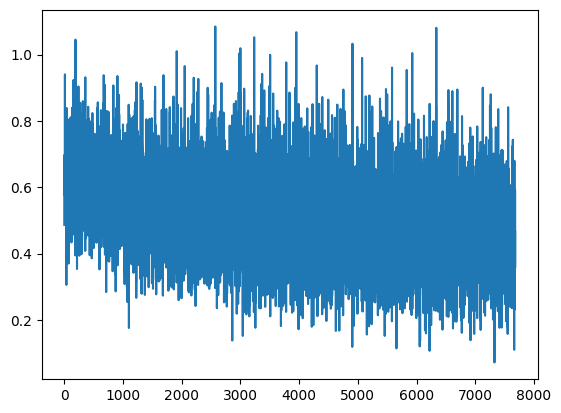

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(Loss)

In [12]:
X_test_tensor = torch.from_numpy(X_test).float()  # Convert to tensor and ensure it's of type float32
predicted = model(X_test_tensor)

In [13]:
y_pred = torch.where(predicted.flatten() > 0.5, 1, 0)

In [14]:
print("The accuracy score is  : ", accuracy_score(y_pred, y_test))
print("The precision score is : ", precision_score(y_pred, y_test))
print("The recall score is    : ", recall_score(y_pred, y_test))
print("The f1 score of ths is : ", f1_score(y_pred, y_test))

The accuracy score is  :  0.7286012526096033
The precision score is :  0.20279720279720279
The recall score is    :  0.6444444444444445
The f1 score of ths is :  0.30851063829787234


In [17]:
#display the weights and biases
model.state_dict()

OrderedDict([('hidden_layer_1.weight',
              tensor([[-0.0068, -0.3332, -0.0206,  ...,  0.1447, -0.9161, -0.1385],
                      [-0.3048, -0.7185,  0.1483,  ...,  0.2482, -0.3410, -0.2887],
                      [-0.1766,  0.0529, -0.0999,  ...,  0.0149, -0.2616, -0.1428],
                      ...,
                      [-0.0365,  0.1047,  0.1363,  ..., -0.0356,  0.0314, -0.2457],
                      [ 0.1090, -0.0721, -0.2045,  ...,  0.0466,  0.5422, -0.3609],
                      [-0.0241, -0.0797,  0.0436,  ..., -0.1738, -0.3158,  0.4181]])),
             ('hidden_layer_1.bias',
              tensor([ 0.0836,  0.0425,  0.0198, -0.1714,  0.1449, -0.2025,  0.1242, -0.2488,
                       0.1079, -0.2003, -0.2369,  0.3213,  0.1181,  0.2426,  0.0971, -0.1932,
                       0.2224,  0.1083,  0.1232, -0.1107, -0.3212, -0.0093, -0.0815,  0.0750,
                       0.0985,  0.0962,  0.3908, -0.1861, -0.1895, -0.0130,  0.1400,  0.0289,
              

In [18]:
#the key() of model.state_dict() functions
print(model.state_dict().keys())

odict_keys(['hidden_layer_1.weight', 'hidden_layer_1.bias', 'hidden_layer_2.weight', 'hidden_layer_2.bias', 'output_layer.weight', 'output_layer.bias'])


In [19]:
"""
  Define a function named `checkpoint`
  torch.save(model_weight, filename). filename might be [`best_model.pth`]
"""
def checkpoint(model = None, filename = None):
  try:
    torch.save(model.state_dict(), filename)
  except Exception as e:
    print(e.with_traceback)

"""
  Define the function named `resume`
  torch.load(filename): - filename might be [`best_model.pth`]
"""
def resume(model = None, filename = None):
  try:
    model.load_state_dict(torch.load(filename))
  except Exception as e:
    print(e.with_traceback)

In [16]:
history

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from torchsummary import summary
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("D:\data\Student_performance_data _.csv")
df.sample(5)
df.isnull().sum()
#split dataset

#convert numpy arrays
X = df.drop(columns=['Tutoring', 'StudentID']).values
y = df['Tutoring'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print('X_train shape is : {}'.format(X_train.shape),'\n')
print('X_test  shape is : {}'.format(X_test.shape),'\n')
print('y_train shape is : {}'.format(y_train.shape),'\n')
print('y_test  shape is : {}'.format(y_test.shape),'\n')
type(X_train)
data_loader = DataLoader(dataset = list(zip(X_train, y_train)),batch_size = 16, shuffle = True)
data, labels = next(iter(data_loader))

prin

In [23]:
"""

    Create a class named Fit and create a default constructor constructors
    EPOCHS: Define how many times the code would be iterated
    TRAIN_LOSS: define the training loss with respect to batch_size
    TRAIN_ACCURACY: Define the training accuracy with resoect to batch_size
    VAL_LOSS: Define the validation loss with respect to val_data & batch_size
    VAL_ACCURACY: Define the validation accuracy with respcet to val_data & batch_size

"""
class Fit:
  def __init__(self):
    self.EPOCHS = 0
    self.THRESHOLD = 0.5
    self.L1_LAMBDA = -1
    self.L2_LAMBDA = -1
    self.TRAIN_LOSS = []
    self.TRAIN_ACCUTCAY = []
    self.VAL_LOSS = []
    self.VAL_ACCURACY = []
    self.history = {'loss': [], 'val_loss': []}


  ############################
  #      Regularization      #
  ############################

  """

      L2 regularization : It is normally used in order to prevent the overfitting problem.
      Formula of L2_regularization is : loss + lambda * weight^2

  """

  def l2(self, lambda_value = None, model = model):
    self.L2_LAMBDA = lambda_value
    # Apply the L2_regularization method
    return self.L2_LAMBDA * sum(torch.norm(parameter, 2) for parameter in model.parameters())

  """

      L1 regularization : It is normally used in order to prevent the overfitting problem
      Formula of L1_regularization is : loss + lambda * |weight|

  """

  def l1(self, lambda_value = None, model = model):
    self.L1_LAMBDA = lambda_value
    # Apply the L1_regularization method
    return self.L2_LAMBDA * sum(torch.norm(parameter, 1) for parameter in model.parameters())


  """

        x : Determine the training data (X_train)
        y : Determine the testing  data (X_test)
        epoch: Determines how many times the code would be executed
        validation_data: val_data(X_test), val_label = y_test
        verbose : It determines the verbose

  """
  def fit(self, x = None, y = None, epochs = None, val_data = None, val_label = None, verbose = 1):
    """

        Convert the train and test dataset with respect to batch_size so that model can run
        train_loader: is an object that will return data as well as label with respect to Training Dataset
        test_loader : is an object that will return data and as label with respect to Testing Dataset
        self.EPOCHS : will store the epoch that is defined by users

    """
    train_loader = DataLoader(list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
    test_loader  = DataLoader(list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)
    self.EPOCHS = epochs

    """

        1. Run a loop with respect to Batch_Size.
        2. Extract the Data (X_batch) and Label (y_batch) from the `train_loader`
        3. Do the prediction by passing the `X_batch` dataset to the model
        4. Compute the loss function with respect to train_prediction and y_batch
        5. Weight and bias updation

    """
    ##########################
    #        Training        #
    ##########################

    model.train()

    for epoch in range(self.EPOCHS):
      store_loss = []
      # Run a loop with respect to train_loader
      for (X_batch, y_batch) in train_loader:
        # Do the prediction
        train_prediction = model(X_batch)
        # Compute the loss function
        train_loss = criterion(train_prediction.flatten(), y_batch)

        """
            1. apply the L2_Regularization with respect to train_loss
            2. Call the l2 method with parameter lambda_value: 001
            3. Then add this value with the main train_loss
        """

        l2_regularization = self.l2(lambda_value = 0.001, model = model)
        train_loss = train_loss + l2_regularization

        # Store the train_loss
        with torch.no_grad():
          self.TRAIN_LOSS.append(train_loss.item())

        """

            For weight and bias updation
            1. Initialize the optimizer
            2. Do the backward propagation of train_loss
            3. Do the step of loss function - training

        """
        # Initialize the optimizer
        optimizer.zero_grad()
        # Do the backward propagation of loss
        train_loss.backward()
        # Do the step with respect to optimizer
        optimizer.step()

      #########################
      #        Testing        #
      #########################

      """

          1. Extract the val_data and val_label with respect to test_loader
          2. Pass the val_data to the model and do the prediction
          3. Compute loss function

      """
      model.eval()

      with torch.no_grad():
        for (val_data, val_label) in test_loader:
          # Do the prediction
          test_prediction = model(val_data)
          # Compute the loss function
          test_loss = criterion(test_prediction.flatten(), val_label)
          # Store loss into VAL_LOSS
          self.VAL_LOSS.append(test_loss.item())

       #############################
       #    Prediction Perpose     #
       #############################

      train_predicted = torch.where(train_prediction.flatten() > self.THRESHOLD , 1, 0)
      test_predicted  = torch.where(test_prediction.flatten() > self.THRESHOLD, 1, 0)
      # Store the train accuracy
      self.TRAIN_ACCUTCAY.append(accuracy_score(train_predicted, y_batch))
      # Store the test accuracy
      self.VAL_ACCURACY.append(accuracy_score(test_predicted, val_label))

      ##########################
      #        Display         #
      ##########################

      print("Epoch {}/{} ".format(epoch + 1, self.EPOCHS))

      """

        Store the loss and accuracy into the dictonary
        loss: Determine the train_loss
        val_loss: Determine the validation_loss

      """
      self.history['loss'].append(np.array(self.TRAIN_LOSS).mean())
      self.history['val_loss'].append(np.array(self.VAL_LOSS).mean())

      print("{}/{} [================================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {} ".format(train_loader.batch_size,\
                                                              train_loader.batch_size,\
                                                              np.array(self.TRAIN_LOSS).mean(),\
                                                              accuracy_score(train_predicted, y_batch),\
                                                              np.array(self.VAL_LOSS).mean(),\
                                                              accuracy_score(test_predicted, val_label)
                                                              ))
    """

        Store the loss and accuracy into the dictonary
        loss: Determine the train_loss
        val_loss: Determine the validation_loss
        accuracy: Determine the train accuracy
        val_accuracy: Determine the validation accuracy

    """
    try:
      self.history['accuracy'] = np.array(self.TRAIN_ACCUTCAY)
      self.history['val_accuracy'] = np.array(self.VAL_ACCURACY)
    except Exception as e:
      print(e.with_traceback)

    return self.history

In [24]:
from sklearn.model_selection import KFold

# Using KFold Cross alidation
Kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
#Initialize some of the varibales that is needed
count = 1
accuracy  = []
precision = []
recall = []
f1 = []
history_list = []
X = torch.tensor(data = X, dtype = torch.float32)
# Run a loop
for train_index, test_index in Kfold.split(X):
  """
    Split the dataset into train and test
  """
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  """
      Convert the train & test into expected Float
      X_train: convert into float
      X_test : convert into float
      y_train: convert into float
      y_test : convert into float
  """
  X_train = torch.tensor(data = X_train, dtype = torch.float32)
  X_test  = torch.tensor(data = X_test, dtype = torch.float32)

  y_train = torch.tensor(data = y_train, dtype = torch.float32)
  y_test  = torch.tensor(data = y_test, dtype = torch.float32)

  try:
    model_fit = Fit()
    history = model_fit.fit(x = X_train, y = y_train, val_data = X_test, val_label = y_test, epochs = 25, verbose = 1)
  except Exception as e:
    print(e.with_traceback())
  else:

    print("="*50,"CV # {} ".format(count), "="*50)
    history_list.append(history)

    """

        Compute the result
        1. Accuracy : Determines how accurate the model is !
        2. Precision: Detertimes what proportion of predicted positive is truly positive
        3. Recall : Determines what proportion of predicted positive is being correctly classified
        4. f1_score: It will in between precision and recall.

    """
    predicted = model(X_test)
    predicted = torch.where(predicted > 0.5, 1, 0)

    #########################
    #   Append the result   #
    #########################

    accuracy.append(accuracy_score(predicted, y_test))
    precision.append(precision_score(predicted, y_test))
    recall.append(recall_score(predicted, y_test))
    f1.append(f1_score(predicted, y_test))

    ##########################
    #   Display the result   #
    ##########################

    print("accuracy  # {} ".upper().format(accuracy_score(predicted, y_test)),'\n')
    print("precision # {} ".upper().format(precision_score(predicted, y_test)),'\n')
    print("recall    # {} ".upper().format(recall_score(predicted, y_test)),'\n')
    print("f1_score  # {} ".upper().format(f1_score(predicted, y_test)))

    count = count + 1

    print("\n"*5)

Epoch 1/25 
16/16 [================================] loss: 0.43796319092313446 - accuracy: 0.7777777777777778 - val_loss: 0.5706375281016032 - val_accuracy: 0.8666666666666667 
Epoch 2/25 
16/16 [================================] loss: 0.43678865060210226 - accuracy: 0.6666666666666666 - val_loss: 0.5693276027838389 - val_accuracy: 0.6 
Epoch 3/25 
16/16 [================================] loss: 0.4381958544668224 - accuracy: 0.8888888888888888 - val_loss: 0.5725189838144514 - val_accuracy: 0.5333333333333333 
Epoch 4/25 
16/16 [================================] loss: 0.43680348185201484 - accuracy: 0.8888888888888888 - val_loss: 0.578959230830272 - val_accuracy: 0.5333333333333333 
Epoch 5/25 
16/16 [================================] loss: 0.4357814221580823 - accuracy: 0.8888888888888888 - val_loss: 0.5838406492273013 - val_accuracy: 0.9333333333333333 
Epoch 6/25 
16/16 [================================] loss: 0.43413522783666847 - accuracy: 0.6666666666666666 - val_loss: 0.582406126

In [25]:
#evaluation

print("Accuray   # {} ".upper().format(np.array(accuracy).mean()),'\n')
print("Precision # {} ".upper().format(np.array(precision).mean()),'\n')
print("Recall    # {} ".upper().format(np.array(recall).mean()),'\n')
print("f1_score  # {} ".upper().format(np.array(f1).mean()))

ACCURAY   # 0.8069007084144968  

PRECISION # 0.5981442474367002  

RECALL    # 0.7312440004154936  

F1_SCORE  # 0.6452971288912495 


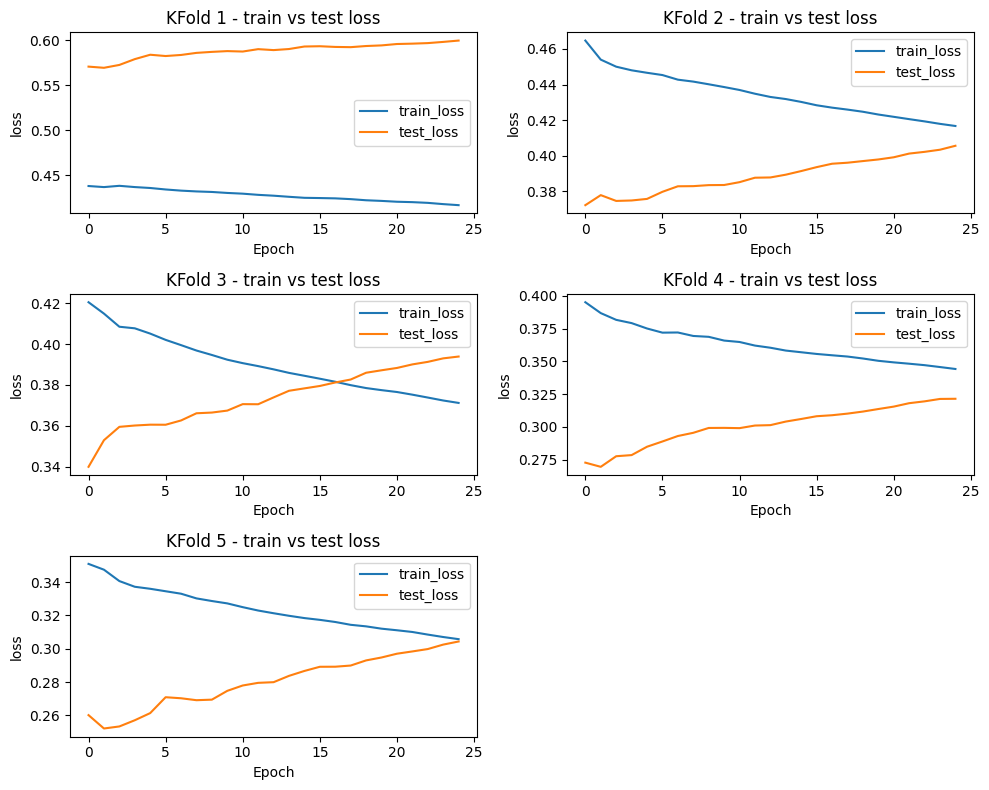

In [26]:
#train-test loss

plt.figure(figsize = (10, 8))
for index, history_ in enumerate(history_list):
  plt.subplot(3, 2, index + 1)
  plt.title("KFold {} - train vs test loss".format(index + 1))
  plt.plot(history_['loss'], label = 'train_loss')
  plt.plot(history_['val_loss'], label = 'test_loss')
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("loss")

plt.tight_layout()
plt.show()

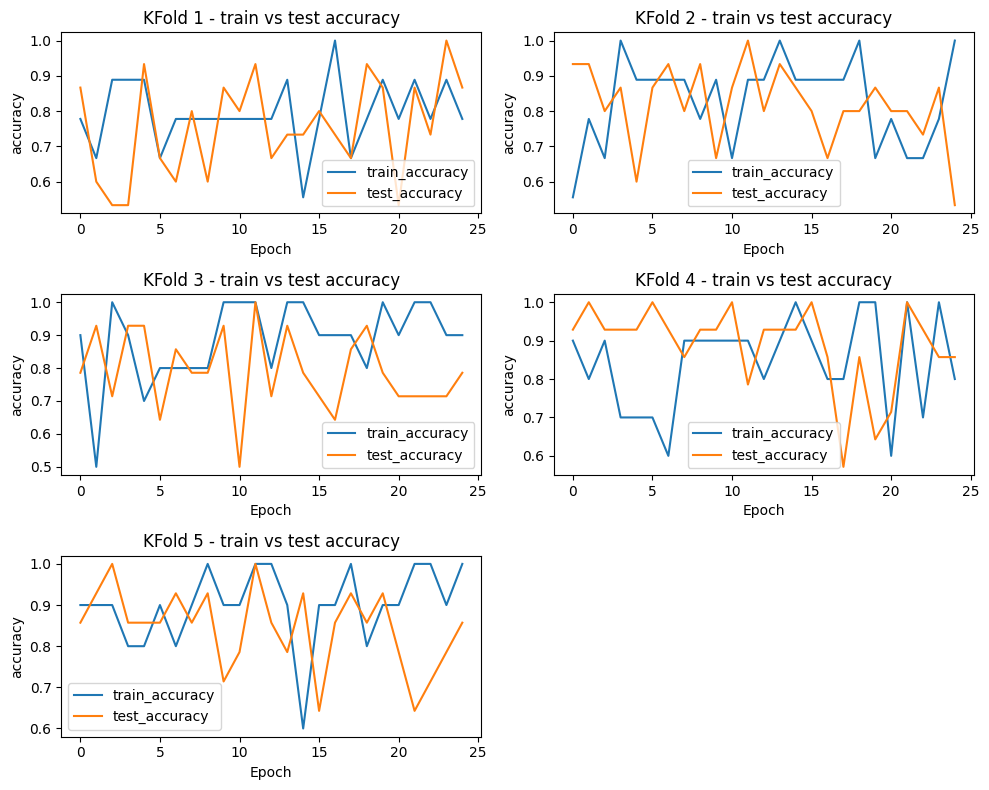

In [27]:
#train-test accuracy

plt.figure(figsize = (10, 8))
for index, history_ in enumerate(history_list):
  plt.subplot(3, 2, index + 1)
  plt.title("KFold {} - train vs test accuracy".format(index + 1))
  plt.plot(history_['accuracy'], label = 'train_accuracy')
  plt.plot(history_['val_accuracy'], label = 'test_accuracy')
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("accuracy")

plt.tight_layout()
plt.show()